In [3]:
from sklearn.datasets import load_iris

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
iris = load_iris()


In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
df= pd.DataFrame (data= iris.data, columns= iris.feature_names)
df['species']= pd.Categorical.from_codes(iris.target, iris.target_names)

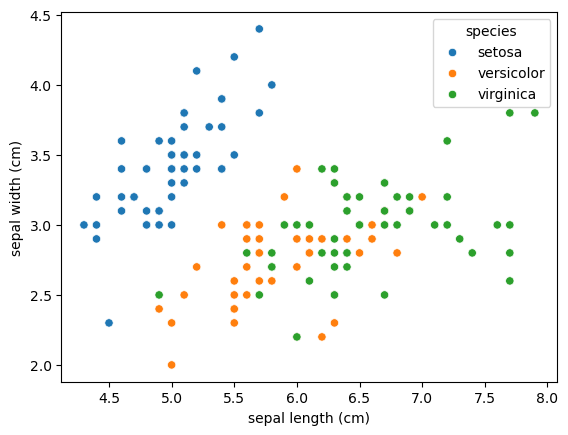

In [12]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title("")
plt.show()

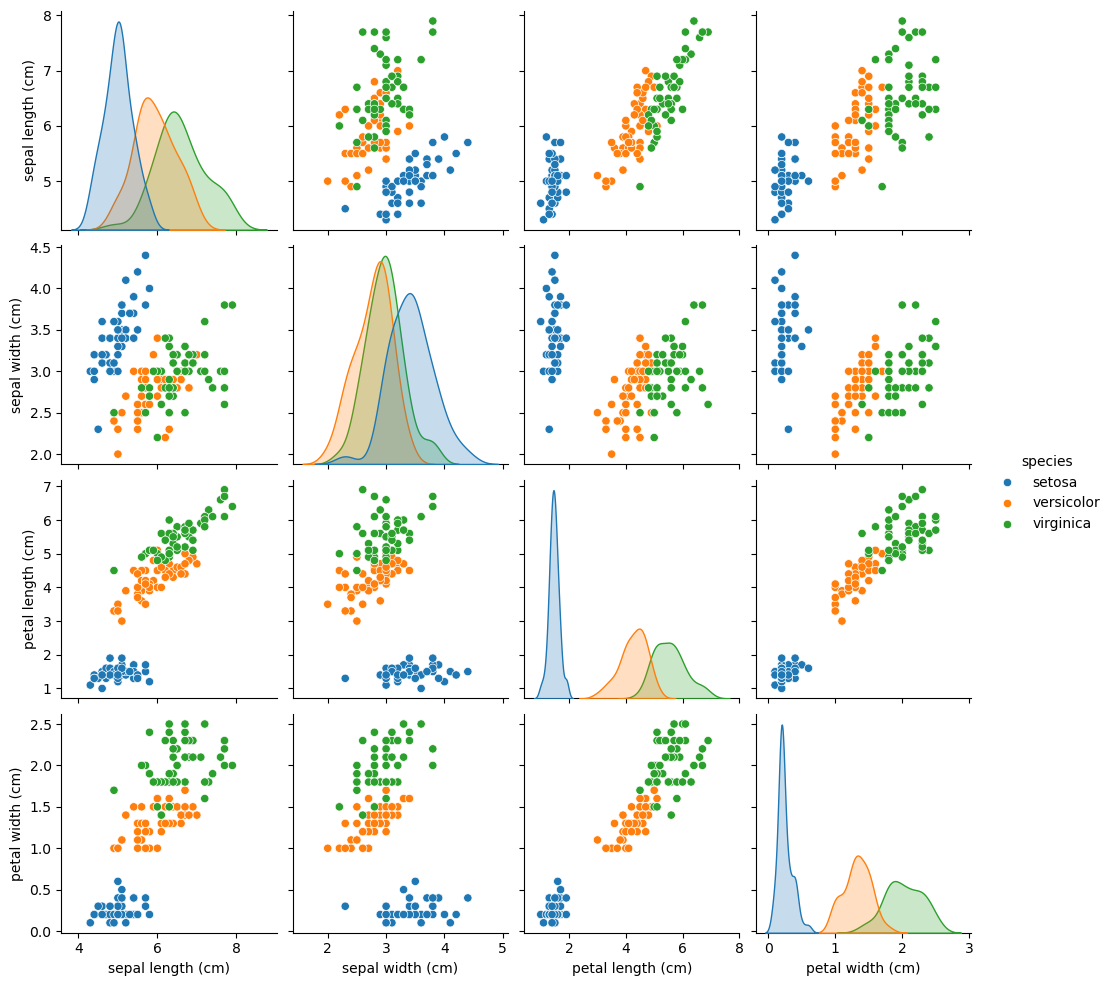

In [14]:
sns.pairplot(df, hue='species')


array([[<Axes: title={'center': 'petal length (cm)'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal width (cm)'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal length (cm)'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal width (cm)'}, xlabel='[species]'>]],
      dtype=object)

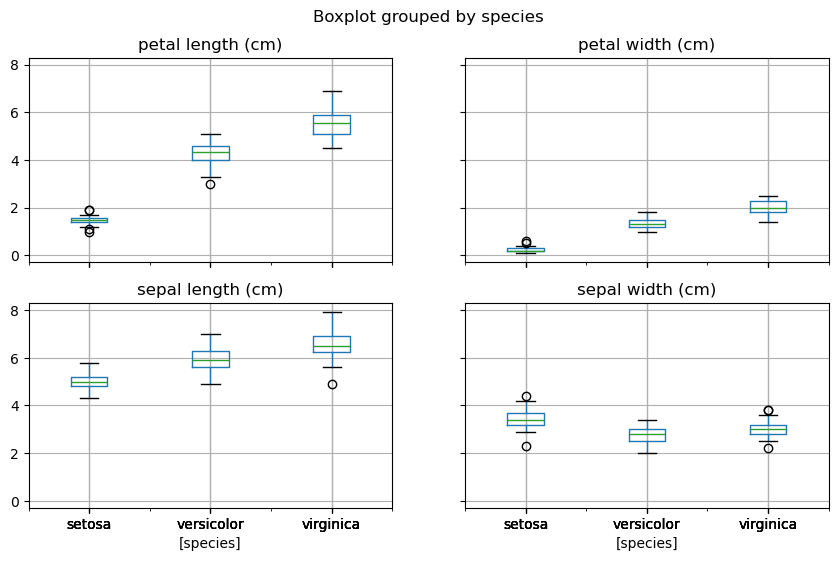

In [16]:
df.boxplot(by='species', figsize=(10,6))

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [29]:
x= df.drop('species', axis=1)
y= df['species']

In [31]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

model=  RandomForestClassifier()
model.fit(x_train, y_train)
predictions= model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

scores= cross_val_score(SVC(), x, y, cv=5)
print("SVM accuracy: ", scores.